## Fraud Detection Transactions Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv("./fraud_detection_transactions_dataset.csv")

In [4]:
df.shape

(50000, 21)

In [5]:
df.head(5)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [6]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [7]:
df.dtypes

Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                   int64
Previous_Fraudulent_Activity      int64
Daily_Transaction_Count           int64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                        int64
Fraud_Label                       int64
dtype: object

In [8]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [9]:
df["Location"].nunique()

5

In [10]:
#Selecting wanted columns
df = df[['Transaction_Amount', 'Transaction_Type',
        'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'Previous_Fraudulent_Activity', 'Card_Type', 'Card_Age',
        'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Fraud_Label']].copy()
df

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Previous_Fraudulent_Activity,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,Amex,65,883.17,Biometric,0.8494,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,Mastercard,186,2203.36,Password,0.0959,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,Visa,226,1909.29,Biometric,0.8400,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,Visa,76,1311.86,OTP,0.7935,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,1,Mastercard,140,966.98,Password,0.3819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Tokyo,Clothing,0,Amex,98,1537.54,PIN,0.1493,0
49996,126.15,POS,28791.75,Mobile,Tokyo,Clothing,0,Visa,93,2555.72,Biometric,0.3653,1
49997,72.02,Online,29916.41,Laptop,Mumbai,Clothing,1,Visa,114,4686.59,Biometric,0.5195,0
49998,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,0,Discover,72,4886.92,Biometric,0.7063,1


In [11]:
df.isna().sum()

Transaction_Amount              0
Transaction_Type                0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
Previous_Fraudulent_Activity    0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Fraud_Label                     0
dtype: int64

In [12]:
df.loc[df.duplicated()]

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Previous_Fraudulent_Activity,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Fraud_Label


<Axes: >

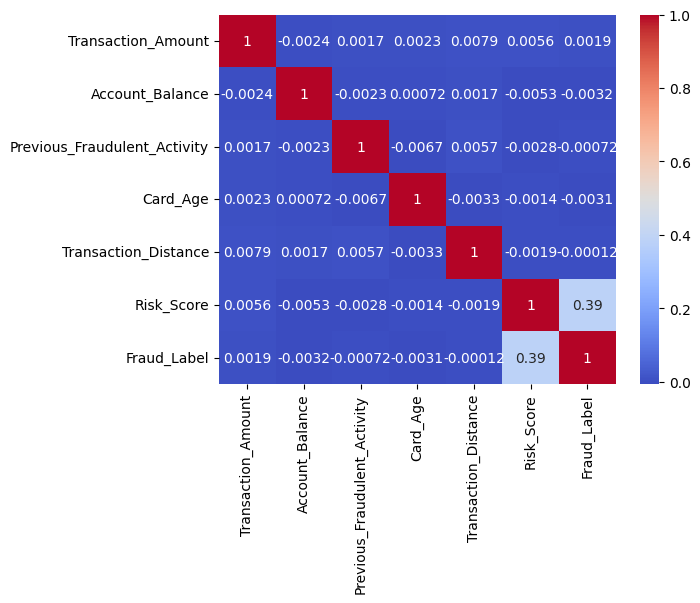

In [22]:
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [ ]:
os.makedirs('../data/', exist_ok=True)
#Saving selected dataframe
df.to_csv('/data/fraud_detection_dataset.csv', index=False)